# Аналитика в Яндекс.Афише

## Оглавление:
* [1. Введение. Описание проекта](#first-bullet)

* [2. Подготовка данных](#second-bullet)
   
* [3. Пользовательские метрики](#3-bullet)

* [4. Характеристики продаж](#4-bullet)

* [5. Маркетинг: расходы, CAC, ROI](#5-bullet)

* [6. Общий вывод](#6-bullet)

<a class="anchor" id="first-bullet"></a>

## 1. Введение. Описание проекта

<p style="text-indent: 25px;">
Цель исследования - определение путей оптимизации маркетинговых затрат в рамках основного бизнеса Яндекс.Афишы.
</p>
<p style="text-indent: 25px;">
В рамках исследования будет проведён анализ следующих данных с июня 2017 по конец мая 2018 года:
    
   - лог сервера с данными о посещениях сайта Яндекс.Афиши,
   - выгрузка всех заказов за этот период,
   - статистика рекламных расходов.

    Предполагается изучение следующего круга вопросов:
    
    
   - как люди пользуются продуктом,
   - когда они начинают покупать,
   - сколько денег приносит каждый клиент
   - когда клиент окупается.
</p>

<a class="anchor" id="second-bullet"></a>

## 2. Подготовка данных

<p style="text-indent: 25px;">Входные данные представлены в виде трёх таблиц, содержащих следующую информацию.</p>

Таблица **visits** (лог сервера с информацией о посещениях сайта):
- Uid — уникальный идентификатор пользователя;
- Device — категория устройства пользователя;
- Start Ts — дата и время начала сессии;
- End Ts — дата и время окончания сессии;
- Source Id — идентификатор рекламного источника, из которого пришел пользователь.

Таблица **orders** (информация о заказах):
- Uid — уникальный id пользователя, который сделал заказ;
- Buy Ts — дата и время заказа;
- Revenue — выручка Яндекс.Афиши с этого заказа.


Таблица **costs** (информация о затратах на маркетинг):
- source_id — идентификатор рекламного источника;
- dt — дата;
- costs — затраты на этот рекламный источник в этот день.

Анализ будет проведён посредством средств языка Python с использованием сопутствующих библиотек.

In [1]:
# для анализа будут использоваться python - библиотеки: Pandas, Matplotlib, Seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
import datetime
import warnings
warnings.filterwarnings("ignore")


In [2]:
# предустановка общих параметров графиков
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})

In [3]:
# импорт файлов
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

df_names = [visits, orders, costs]

In [4]:
# агрегирование нужной информации о датасете посредством функции.
# Реализовано с целью улучшения визуалиции информации.

def intro_df(df_name):

    entries_count = pd.DataFrame(df_name.nunique())
    entries_count.columns = ['values_counts']

    columns_types = pd.DataFrame(df_name.dtypes)
    columns_types.columns = ['dtypes']
    columns_types

    entries_count_isnull = pd.DataFrame(df_name.isnull().sum())
    entries_count_isnull.columns = ['isnull_counts']
    entries_count_isnull

    df_name_intro_info = entries_count.join(columns_types).join(entries_count_isnull)
    
    df_name.columns = df_name.columns.str.lower().str.replace(' ','_')
    
    #print(df_name.name)
    print('Параметры таблицы , (строк, полей):', df_name.shape)
    display(df_name_intro_info.transpose())
    print('Первые 5 строк таблицы:')
    display(df_name.head())
    print('____________________________________________________________________________________________________')
    print()


for df_name in df_names: intro_df(df_name)

Параметры таблицы , (строк, полей): (359400, 5)


,Device,End Ts,Source Id,Start Ts,Uid
values_counts,2,224760,9,224303,228169
dtypes,object,object,int64,object,uint64
isnull_counts,0,0,0,0,0


Первые 5 строк таблицы:


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


____________________________________________________________________________________________________

Параметры таблицы , (строк, полей): (50415, 3)


,Buy Ts,Revenue,Uid
values_counts,45991,1149,36523
dtypes,object,float64,uint64
isnull_counts,0,0,0


Первые 5 строк таблицы:


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


____________________________________________________________________________________________________

Параметры таблицы , (строк, полей): (2542, 3)


,source_id,dt,costs
values_counts,7,364,2396
dtypes,int64,object,float64
isnull_counts,0,0,0


Первые 5 строк таблицы:


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


____________________________________________________________________________________________________



In [5]:
# преобразование релевантных полей из типа данных object в datetime
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M')
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M')
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format = '%Y-%m-%d %H:%M')
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d')

*Вывод по разделу*

Названия столбцов преобразованы в нижний регистр и в них удалены пробелы.<br>
В данных отсутствуют пропущенные значения.<br>
Три поля ('Start Ts', 'Buy Ts', 'dt') с некорректным типом данных object преобразованы в datetime.<br>

Предварительный анализ показывает корректность и достаточность данных для целей исследования.


<a class="anchor" id="3-bullet"></a>

## 3. Пользовательские метрики

<p style="text-indent: 25px;">
Для оценки клиентской востребованности ресурса произведём расчёт количества и длительности клиентских сессий, динамики появления новых пользователей и показателей возврата пользователей с использованием когортного анализа.
</p>


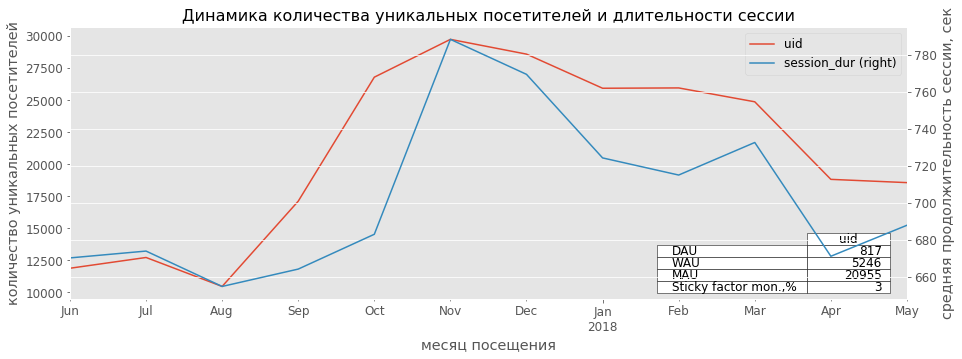

In [6]:
# выделение вспомогательных временных параметров
visits['day'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.week
visits['month'] = visits['start_ts'].astype('datetime64[M]')

# расчёт длительности клиентских сессий
visits['session_dur'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

# в рабочей выборке остаются только сессии с продолжительностью более нуля, т.к. только в этом случае можно
# говорить о целевом характере взаимодействия пользователя с ресурсом
visits_nonzero = visits.query('session_dur > 0')

# расчёт и агрегация данных об уникальных пользователях
dau = visits_nonzero.groupby('day').agg({'uid': 'nunique'}).mean()
wau = visits_nonzero.groupby('week').agg({'uid': 'nunique'}).mean()
mau = visits_nonzero.groupby('month').agg({'uid': 'nunique'}).mean()
st_fs = pd.DataFrame({'DAU': dau, 'WAU': wau, 'MAU': mau, 'Sticky factor mon.,%': dau/mau*100})\
        .transpose().astype('int')

# график количества посетителей и длительности сессии
fig, ax = plt.subplots(figsize = (15,5))
table(ax, st_fs, loc=4, colWidths=[0.1])

visits_nonzero.groupby('month').agg({'uid': 'nunique'})\
              .plot(ax=ax)

visits_nonzero.groupby('month').agg({'session_dur': 'mean'})\
              .plot(secondary_y = True, ax=ax)

plt.title("Динамика количества уникальных посетителей и длительности сессии", fontsize = 16)
ax.set_xlabel('месяц посещения')
ax.set_ylabel('количество уникальных посетителей')
ax.right_ax.set_ylabel('средняя продолжительность сессии, сек')
plt.show()

ASL (модальное значение), сек.: 60


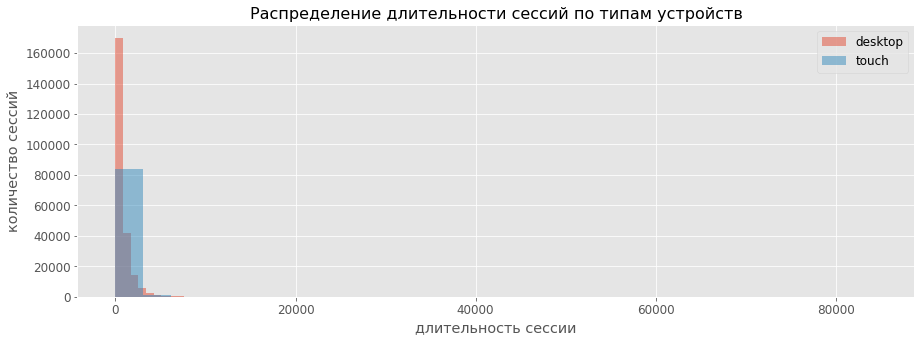

In [7]:
# разделение сессий по типам устройств
visits_des = visits_nonzero.query('device == "desktop"')
visits_tou = visits_nonzero.query('device == "touch"')

# расчёт средней длительности сессий
asl = visits_nonzero['session_dur'].mode()
print('ASL (модальное значение), сек.:', int(asl))

# график распределения длительности сессий в разрезе типов устройств
fig, ax = plt.subplots(figsize = (15,5))

plt.hist(visits_des['session_dur'], alpha = 0.5, bins = 100)
plt.hist(visits_tou['session_dur'], alpha = 0.5)

plt.title("Распределение длительности сессий по типам устройств", fontsize = 16)
plt.xlabel('длительность сессии')
plt.ylabel('количество сессий')
plt.legend(['desktop', 'touch'])
plt.show()

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Да, ты верный показатель рассмотрел.

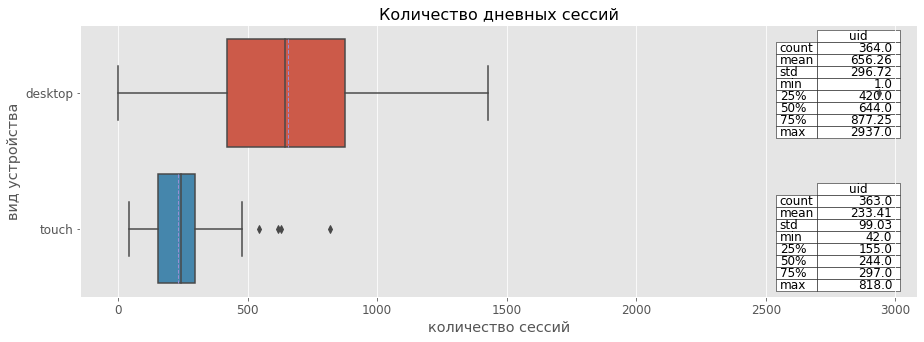

In [8]:
# группировка для определения количества ненулевых сессий
sess = visits_nonzero.groupby(['day', 'device']).agg({'uid': 'count'}).reset_index()

# график и describe() распределения дневных сессий
fig, ax = plt.subplots(figsize = (15,5))

table(ax,
      np.round(sess[sess['device'] == 'desktop'].describe(), 2), 
      loc='upper right', 
      colWidths=[0.1])

table(ax, 
      np.round(sess[sess['device'] == 'touch'].describe(), 2), 
      loc='lower right', 
      colWidths=[0.1])

sns.boxplot(x = 'uid',  
            y = 'device', 
            data = sess, 
            meanline=True, 
            showmeans=True)

plt.title("Количество дневных сессий", fontsize = 16)
plt.xlabel('количество сессий')
plt.ylabel('вид устройства')
plt.show()

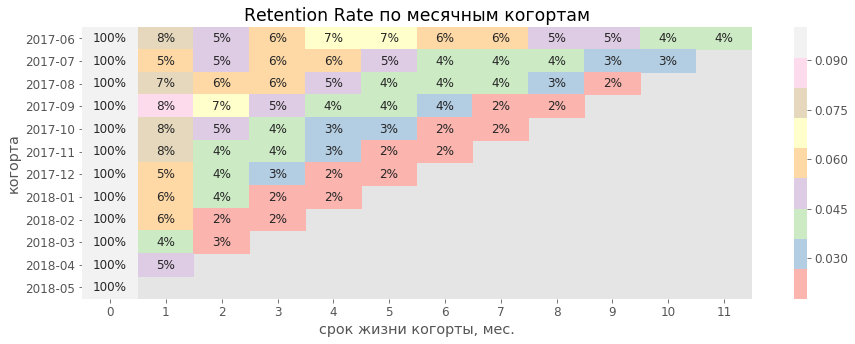

In [9]:
# расчёт Retantion rate

# определение первой сессии для каждого uid
first_sess = visits_nonzero.groupby(['uid'])['start_ts'].min()
first_sess.name = '1st_sess'

# соединение данных по сессиям с данными по первым сессиям каждого uid
ret_r = visits_nonzero.join(first_sess, on = 'uid')

# изменение форматов в полях со временем
ret_r['1st_sess'] = pd.to_datetime(ret_r['1st_sess'], format = '%Y-%m-%d')
ret_r['1st_month'] = ret_r['1st_sess'].astype('datetime64[M]')

# расчет времени жизни когорты
ret_r['lifetime'] = (ret_r['month'] - ret_r['1st_month'])/np.timedelta64(1, 'M')
ret_r['lifetime'] = ret_r['lifetime'].round().astype('int')

# выделение времени жизни для каждой когорты и соединение с общими даными
coh_ret_r = ret_r.groupby(['1st_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()
coh_uids = coh_ret_r[coh_ret_r['lifetime'] == 0][['1st_month','uid']]
coh_uids = coh_uids.rename(columns = {'uid': 'coh_uids'})
coh_ret_r = coh_ret_r.merge(coh_uids, on='1st_month')

# расчёт Ret. rate для uid
coh_ret_r['ret_r'] = coh_ret_r['uid'] / coh_ret_r['coh_uids']

# формирование сводной таблицы и построение тепловой карты
ret_r_piv = coh_ret_r.pivot_table\
                    (index = '1st_month',
                     columns = 'lifetime',
                     values = 'ret_r', 
                     aggfunc = 'sum')

plt.figure(figsize = (15,5))

sns.heatmap(ret_r_piv, 
            annot = True, 
            fmt = '.0%', 
            cmap = 'Pastel1', 
            yticklabels=ret_r_piv.index.strftime('%Y-%m'),
            vmax = 0.1)

plt.title('Retention Rate по месячным когортам')
plt.xlabel('срок жизни когорты, мес.')
plt.ylabel('когорта')
plt.show()

*Вывод по разделу*

<p style="text-indent: 25px;">Дневная аудитория ресурса составляет 800 человек, месячная - около 21 тыс. чел. Максимум, около 30 тыс. человек, зафиксирован в ноябре 2017 перед мероприятиями конца года.<p>
<p style="text-indent: 25px;">Модальное значение длительности сессии составляет 60 секунд по всем типам устройств, при этом для десктопных версий присутствуют выбросы длительности, при этом количество дневных сессий значительно больше для десктопных устройств, в медианном значении 644 против 244 сесий в день. <p>
<p style="text-indent: 25px;">Retention Rate для всех месячных когорт является низким - от 2 до 8%, при этом sticky factor за месяц зафиксирован на уровне 3%.<p>
<p style="text-indent: 25px;">По итогам года работы отмечается прирост как количества, так и длительности сессий: с 12500 до 18000 сессий в месяц и с 670 до 710 секунд соответственно.<p>

<a class="anchor" id="4-bullet"></a>

## 4. Характеристики продаж

<p style="text-indent: 25px;"> Будет произведена оценка динамики выручки, прироста новых клиентов и конверсии, а также когортная оценка среднего чека (AOL) и накопительной выручки (LTV).</p>

In [10]:
# определение даты первой покупки
first_ord = orders.groupby('uid')['buy_ts'].min()
first_ord.name = '1st_buy_ts'

# фиксация типа устройства для uid
first_sess = visits_nonzero.sort_values(by = ['uid', 'start_ts']).groupby('uid')\
                           .agg({'start_ts' : 'first', 'source_id': 'first', 'device': 'first'})

# подготовка сводных данных для последующих расчетов
rep = orders.join(first_ord, on = 'uid')\
            .join(first_sess, on = 'uid')

rep['buy_month'] = rep['buy_ts'].astype('datetime64[M]')
rep['1st_buy_month'] = rep['1st_buy_ts'].astype('datetime64[M]')

# удаление одного uid за июнь 2018 для улучшения визуализации
rep = rep.drop(rep[rep['1st_buy_month'] == '2018-06-01'].index)

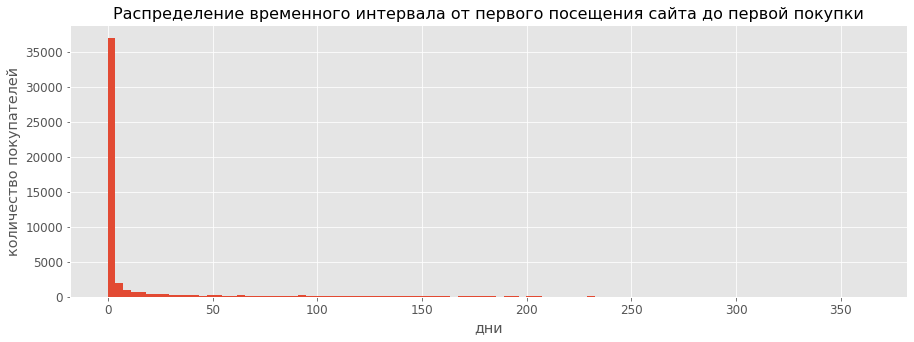

Среднее время на покупку (модальное значение), дней.: 0


In [11]:
# определение дельты между первым посещением сайта до покупки
rep['buy_time'] = (rep['1st_buy_ts'] - rep['start_ts']) / np.timedelta64(1,'D')

# удаление из выборки отрицательных значений, возникших из-за технической ошибки выгрузки
rep_buy = rep.query('buy_time >= 0')

# построение распределения времени покупки
fig, ax = plt.subplots(figsize = (15,5))
rep_buy['buy_time'].hist(bins = 100)
plt.title("Распределение временного интервала от первого посещения сайта до первой покупки", fontsize = 16)
plt.xlabel('дни')
plt.ylabel('количество покупателей')
plt.show()

buy_time = rep_buy['buy_time'].mode()
print('Среднее время на покупку (модальное значение), дней.:', int(buy_time))

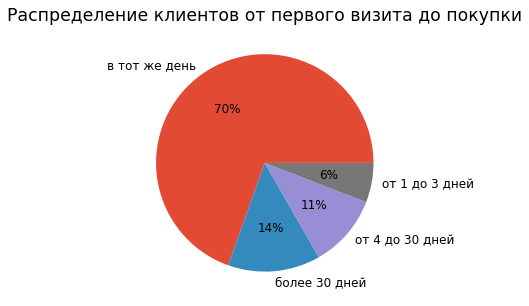

In [27]:
# функция группировки ориентиров времени на первую покупку
def sector(rep_buy):
    if rep_buy['buy_time'] < 1: return 'в тот же день'
    elif (rep_buy['buy_time'] >= 1) & (rep_buy['buy_time'] < 4): return 'от 1 до 3 дней'
    elif (rep_buy['buy_time'] >= 4) & (rep_buy['buy_time'] < 30): return 'от 4 до 30 дней'
    else: return 'более 30 дней'

rep_buy['sector'] = rep_buy.apply(sector, axis=1)

# построение диаграммы распределения времени между первым посещением и первой покупкой
plt.figure(figsize = (15,5))
rep_buy.groupby('sector')['buy_time'].\
        count().\
        sort_values(ascending = False)\
        .plot(kind = 'pie', autopct='%1.0f%%')

plt.title('Распределение клиентов от первого визита до покупки')
plt.ylabel('')
plt.show()

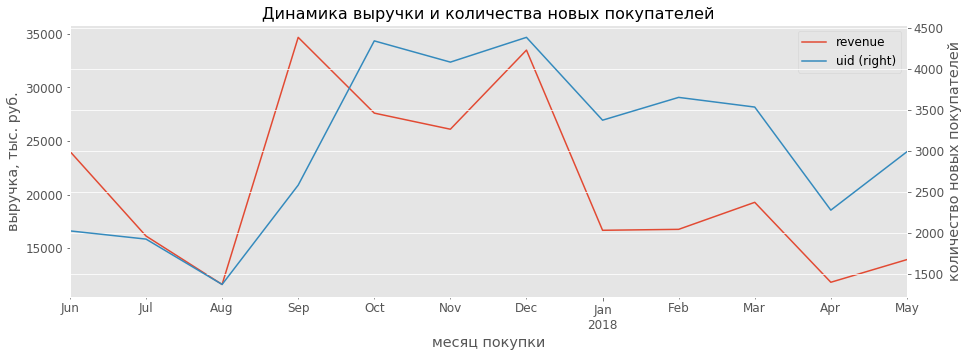

In [13]:
# группировка данных и визуализация динамики выручки и кол-ва новых клиентов
rev = rep.groupby('1st_buy_month').agg({'revenue':'sum'})
uids = rep.groupby('1st_buy_month').agg({'uid':'nunique'})

fig, ax = plt.subplots(figsize = (15,5))
rev.plot(ax=ax)
uids.plot(secondary_y = True, ax=ax)
plt.title("Динамика выручки и количества новых покупателей", fontsize = 16)
ax.set_xlabel('месяц покупки')
ax.set_ylabel('выручка, тыс. руб.')
ax.right_ax.set_ylabel('количество новых покупателей')
plt.show()

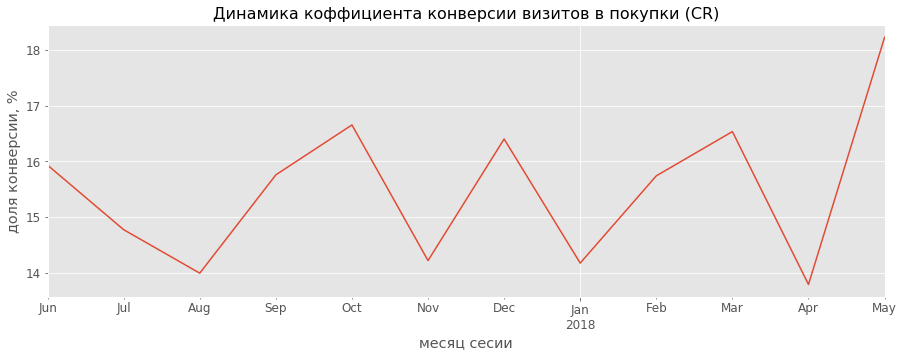

In [14]:
# расчёт динамики конверсии 'сессия\покупка' - помесячное соотнесение количества сессий и кол-ва покупок
sess_all = visits_nonzero.groupby('month')['uid'].count().reset_index()
sess_all.columns = ['sess_month', 'sess']
buy_mon = rep.groupby('buy_month')['uid'].count().reset_index()
buy_mon.columns = ['buy_month', 'buyers']
cr = pd.merge(sess_all, buy_mon, left_on = 'sess_month', right_on = 'buy_month')
cr['cr_buy'] = cr['buyers'] / cr['sess']*100

# график коэфф. конверсии
fig, ax = plt.subplots(figsize = (15,5))

cr.plot(x = 'sess_month', 
        y = 'cr_buy', 
        ax=ax, 
        legend = False)

plt.title("Динамика коффициента конверсии визитов в покупки (CR)", fontsize = 16)
ax.set_xlabel('месяц сесии')
ax.set_ylabel('доля конверсии, %')
plt.show()

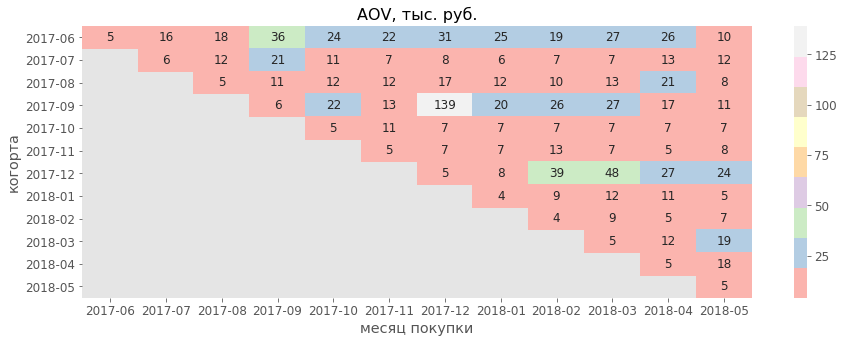

In [15]:
# расчёт среднего чека
orders_by_cogs = rep.groupby(['1st_buy_month', 'buy_month']).agg({'revenue':'sum','uid':'nunique'})
orders_by_cogs['aov'] = orders_by_cogs['revenue'] / orders_by_cogs['uid']

aov = orders_by_cogs.pivot_table\
            (index = '1st_buy_month',
             columns = 'buy_month',
             values = 'aov',
             aggfunc = 'mean')\
             .round()

# визуализация расчёта тепловой картой
fig, ax = plt.subplots(figsize = (15,5))
sns.heatmap(aov, 
            annot = True, 
            cmap = 'Pastel1', 
            fmt = '.5g', 
            yticklabels=aov.index.strftime('%Y-%m'),
            xticklabels=aov.columns.strftime('%Y-%m'))

plt.title("AOV, тыс. руб.", fontsize = 16)
plt.xlabel('месяц покупки')
plt.ylabel('когорта')
plt.show()

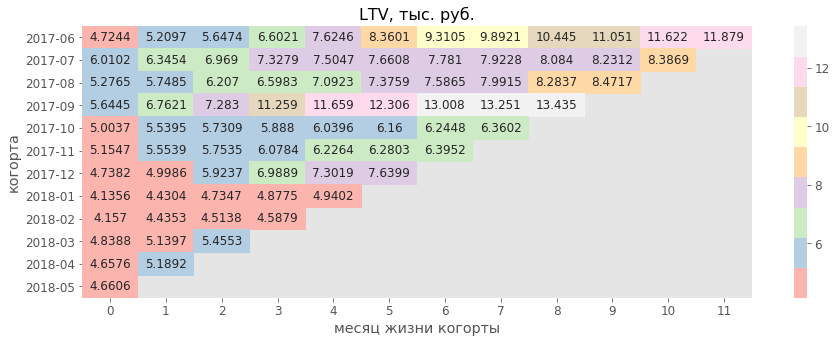

In [16]:
# группировка данных о размере когорты
cohort_sizes = rep.groupby('1st_buy_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['1st_buy_month', 'n_buyers']

# группировка данных для соотнесения когорт и выручки
cohorts_rev = rep.groupby(['1st_buy_month', 'buy_month']).agg({'revenue': 'sum'}).reset_index()

# объединение группировок размера когорт и их выручки, расчёт LTV
ltv = pd.merge(cohort_sizes, cohorts_rev, on='1st_buy_month')
ltv['age'] = (ltv['buy_month'] - ltv['1st_buy_month'])/np.timedelta64(1, 'M')
ltv['age'] = ltv['age'].round().astype('int')
ltv['ltv'] = ltv['revenue'] / ltv['n_buyers']

# расчёт LTV по когортам накопительным итогом
ltv_t = ltv.pivot_table(index = '1st_buy_month', columns = 'age', values = 'ltv').cumsum(axis = 1)

# визуализация расчёта LTV тепловой картой
fig, ax = plt.subplots(figsize = (15,5))

sns.heatmap(data = ltv_t, 
            annot = True, 
            cmap = 'Pastel1', 
            fmt = '.5g',
            yticklabels=aov.index.strftime('%Y-%m'))

plt.title("LTV, тыс. руб.", fontsize = 16)
plt.xlabel('месяц жизни когорты')
plt.ylabel('когорта')
plt.show()

*Вывод по разделу*

<p style="text-indent: 25px;">Месячная выручка году к году значительно снизилась, с 24 млн. руб. до 1,7 млн., достигнув пиков с сентябре и декабре 2017 года на уровне 33-34 млн. руб. Одновременно возросло месячное количество новых клиентов, прирост составил около 1000 клиентов, максимумы отмечены в октябре и декабря на уровне 4500 новых клиентов в месяц.<p>
<p style="text-indent: 25px;">При этом стоит отметить рост показателя CR покупок с 16% до 18%, при фиксации максимума этого показателя в мае 2018 года.<p>
<p style="text-indent: 25px;">AOL, средний чек, значительно разнится в зависимости от когорты. При базовом уровне в 4-18 тыс. руб., возможны всплески до уровня 22-48 руб., максимум закономерно зафиксирован в декабре на уровне 139 тыс. руб. Выделяются когорты последнего месяца квартала, что вероятно связано с бухгалтерским оформлением выручки.<p>
<p style="text-indent: 25px;">LTV в нулевой месяц стартует с 4-6 тыс.руб. в зависимости о когорты, повышаясь до 11 - 13 тыс. руб для когорт старше январской 2018 года. Для когорт 2018 года характерна стагнация LTV на уровне нулевого месяца.<p>

<a class="anchor" id="5-bullet"></a>

## 5. Маркетинг: расходы, CAC, ROI

<p style="text-indent: 25px;"> В разделе анализируются расходы в разрезе источников привлечения клиентов, производится расчёт средней стоимости привлечения клиентов по источникам привлечения (CAC), характеристики возврата инвестиций на маркетинг (ROI) в разрезе когорт, источников привлечения и типов устройств.</p>

In [17]:
costs['month'] = costs['dt'].astype('datetime64[M]')
print('Общая сумма расходов: {:.1f} руб.'.format(costs['costs'].sum()))

Общая сумма расходов: 329131.6 руб.


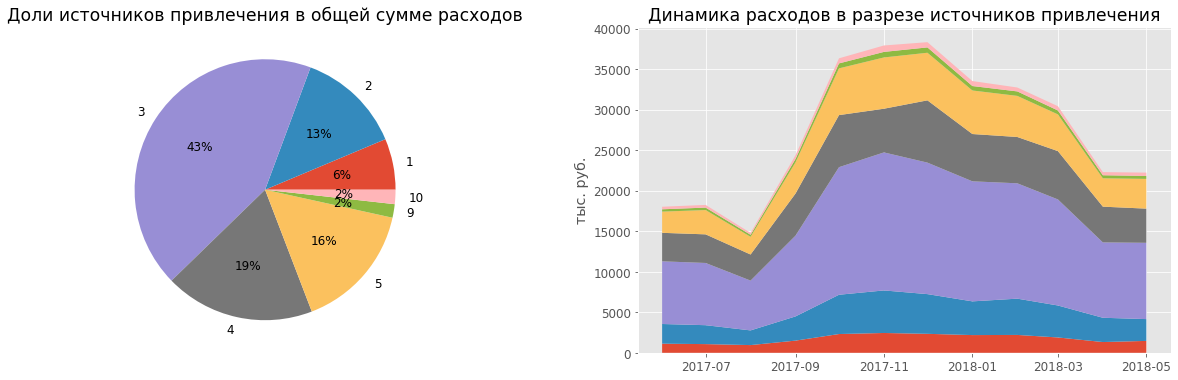

In [18]:
# визуализация расходов по источникам привлечения
fig, ax = plt.subplots(1,2, figsize = (21,6))

# график pie
costs.groupby('source_id')['costs'].sum().plot(y = 'source_id', kind = 'pie', autopct='%1.0f%%', ax = ax[0])
ax[0].set_title('Доли источников привлечения в общей сумме расходов')
ax[0].set_ylabel('')

# График stack построен без элементов автоматизации, т.к. это быстрее, а возможное масштабирование сомнительно.
v = costs.groupby(['source_id', 'month'])['costs'].sum().reset_index()
x = v['month'].head(12)
y1 = v[v['source_id'] == 1]['costs']
y2 = v[v['source_id'] == 2]['costs']
y3 = v[v['source_id'] == 3]['costs']
y4 = v[v['source_id'] == 4]['costs']
y5 = v[v['source_id'] == 5]['costs']
y9 = v[v['source_id'] == 9]['costs']
y10 = v[v['source_id'] == 10]['costs']
plt.stackplot(x,y1,y2,y3,y4,y5,y9,y10)
ax[1].set_title('Динамика расходов в разрезе источников привлечения')
ax[1].set_ylabel('тыс. руб.')
#ax[1].legend(('1', '2', '3', '4', '5', '9', '10'))

plt.show()

In [19]:
# расчёт помесячных costs и объединение с LTV
costs_mon = costs.groupby(['month'])['costs'].sum().reset_index()
report = ltv.merge(
             costs_mon, 
             how = 'left', 
             left_on='1st_buy_month', 
             right_on='month')

# расчёт CAC
report['cac'] = report['costs'] / report['n_buyers']

Общий CAC: 9.1 тыс. руб.


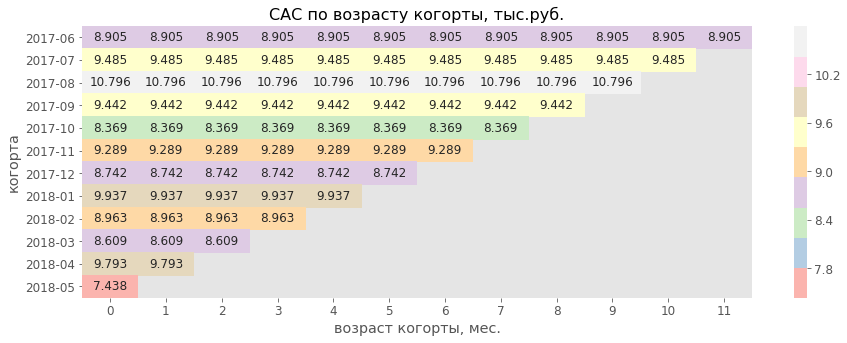

In [20]:
# группировка по возрасту когорты
cac_age = report.pivot_table(
           index = '1st_buy_month', 
           columns = 'age',
           values = 'cac', 
           aggfunc = 'mean')\
           .round(3)

# расчёт общего CAC
cac_tot = report.pivot_table(
          index = '1st_buy_month',
          values = 'cac', 
          aggfunc = 'mean')

print('Общий CAC: {:.1f} тыс. руб.'.format(cac_tot['cac'].mean()))

# визуализация сводной таблицы расчёта CAC по возрасту когорты
fig, ax = plt.subplots(figsize = (15,5))

sns.heatmap(
    cac_age, 
    annot = True, 
    cmap = 'Pastel1', 
    fmt = '.5g', 
    yticklabels=aov.index.strftime('%Y-%m'))

plt.title("CAC по возрасту когорты, тыс.руб.", fontsize = 16)
plt.ylabel('когорта')
plt.xlabel('возраст когорты, мес.')
plt.show()

In [21]:
# расчёт CAC по идентификаторам источников

# группировка costs по источникам привлечения
costs_sou = costs.groupby(['month', 'source_id'])['costs'].sum().reset_index()

#разделение когорт по источникам привлечения
#cohort_sizes = rep.groupby('1st_buy_month').agg({'uid': 'nunique'}).reset_index()
#cohort_sizes.columns = ['1st_buy_month', 'n_buyers']

cohort_sou = rep.groupby(['1st_buy_month', 'source_id']).agg({'uid':'nunique'}).reset_index()
cohort_sou.columns = ['1st_buy_month', 'source_id', 'n_buyers']

# группировка данных для соотнесения когорт и выручки
cohorts_rev_sou = rep.groupby(['1st_buy_month', 'buy_month', 'source_id']).agg({'revenue': 'sum'}).reset_index()

# объединение группировок размера когорт и их выручки, расчёт LTV
ltv_sou = pd.merge(cohort_sou, cohorts_rev_sou, on='1st_buy_month')
ltv_sou['age'] = (ltv_sou['buy_month'] - ltv_sou['1st_buy_month'])/np.timedelta64(1, 'M')
ltv_sou['age'] = ltv_sou['age'].round().astype('int')
ltv_sou['ltv'] = ltv_sou['revenue'] / ltv_sou['n_buyers']

report_sou = ltv_sou.merge(
             costs_sou, 
             how = 'left', 
             left_on='1st_buy_month', 
             right_on='month')

# расчёт CAC
report_sou['cac'] = report_sou['costs'] / report_sou['n_buyers']

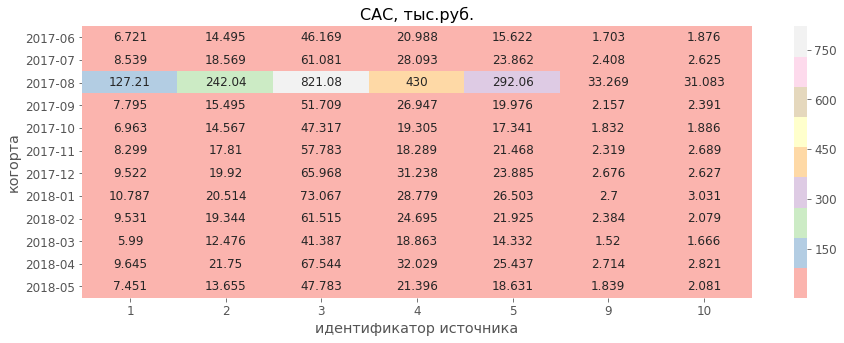

In [22]:
# группировка по источникам
cac_sou = report_sou.pivot_table(
           index = '1st_buy_month', 
           columns = 'source_id', 
           values = 'cac', 
           aggfunc = 'mean')\
           .round(3)

# визуализация сводной таблицы расчёта CAC
fig, ax = plt.subplots(figsize = (15,5))

sns.heatmap(
    cac_sou, 
    annot = True, 
    cmap = 'Pastel1', 
    fmt = '.5g', 
    yticklabels=aov.index.strftime('%Y-%m'))

plt.title("CAC, тыс.руб.", fontsize = 16)
plt.ylabel('когорта')
plt.xlabel('идентификатор источника')
plt.show()

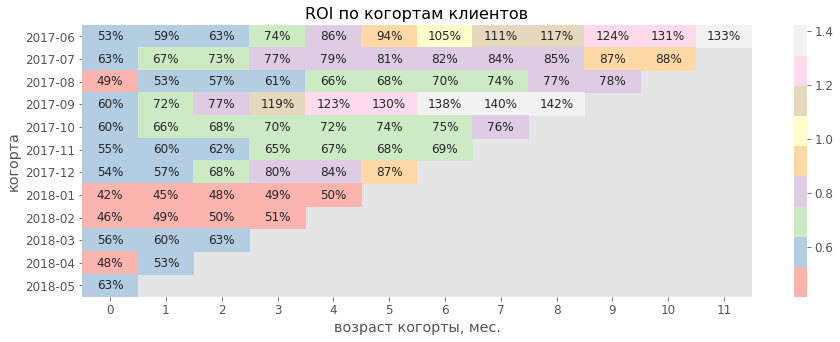

In [23]:
# расчёт накопительным итогом и визуализация ROI
report['roi'] = report['ltv'] / report['cac']

roi = report.pivot_table(
            index = '1st_buy_month', 
            columns = 'age', 
            values = 'roi')\
            .cumsum(axis=1)

fig, ax = plt.subplots(figsize = (15,5))

sns.heatmap(
    roi, 
    annot = True, 
    cmap = 'Pastel1', 
    fmt = '.0%', 
    yticklabels=aov.index.strftime('%Y-%m'))

plt.title("ROI по когортам клиентов", fontsize = 16)
plt.ylabel('когорта')
plt.xlabel('возраст когорты, мес.')
plt.show()

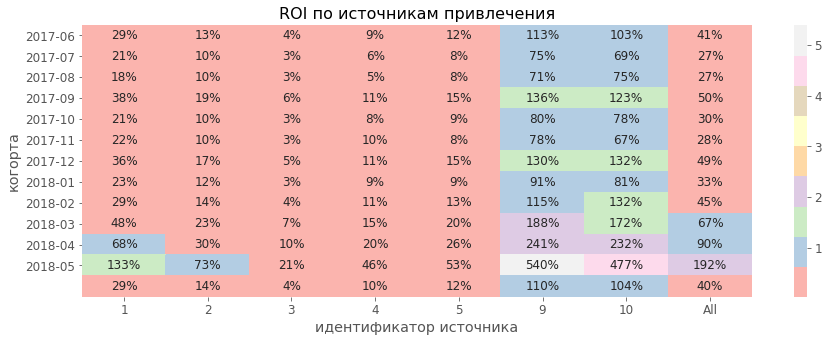

In [24]:
# расчёт накопительным итогом и визуализация ROI для источников привлечения
report_sou['roi'] = report_sou['ltv'] / report_sou['cac']

# группировка в разрезе когорт и источников
roi_sou = report_sou.pivot_table(
                index = '1st_buy_month',
                columns = 'source_id',
                values = 'roi',
                margins = True)
# визуализация группировки в разрезе когорт и источников
plt.figure(figsize = (15,5))

sns.heatmap(
    data = roi_sou, 
    annot = True, 
    cmap = 'Pastel1', 
    fmt = '.0%', 
    yticklabels=aov.index.strftime('%Y-%m'))

plt.title("ROI по источникам привлечения", fontsize = 16)
plt.ylabel('когорта')
plt.xlabel('идентификатор источника')
plt.show()

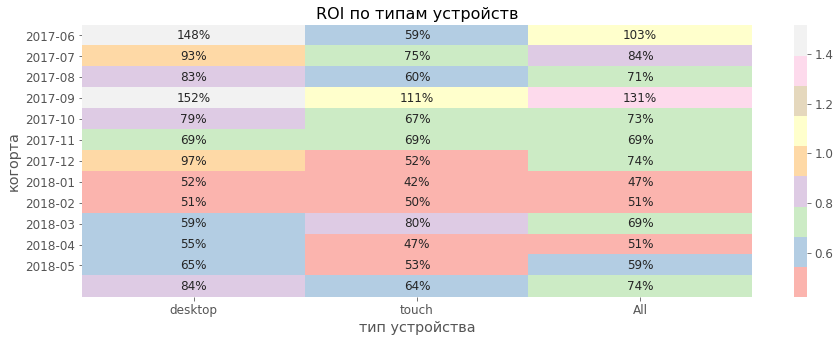

In [25]:
# расчёт ROI по типам устройств

# группировка когорт и выручки с разрезе типов устройств
cohort_sizes_dev = rep.groupby(['1st_buy_month', 'device']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes_dev.columns = ['1st_buy_month', 'device', 'n_buyers']
cohorts_dev = rep.groupby(['1st_buy_month', 'buy_month', 'device']).agg({'revenue': 'sum'}).reset_index()


ltv_dev = pd.merge(
    cohort_sizes_dev, 
    cohorts_dev, 
    on=['1st_buy_month', 'device'])

# расчёт LTV в группированных данных
ltv_dev['age'] = (ltv_dev['buy_month'] - ltv_dev['1st_buy_month'])/np.timedelta64(1, 'M')
ltv_dev['age'] = ltv_dev['age'].round().astype('int')
ltv_dev['ltv'] = ltv_dev['revenue'] / ltv_dev['n_buyers']
ltv_dev_gro = ltv_dev.groupby(['1st_buy_month', 'device']).agg({'ltv': 'sum'}).reset_index()

# объединение данных с LTV и CAC
roi_dev = pd.merge(ltv_dev_gro, cac_tot, on = '1st_buy_month')

# расчёт ROI в разерезе устройств, группировка по когортам и визуализация тепловой картой
roi_dev['roi'] = roi_dev['ltv'] / roi_dev['cac']

roi_dev_t = roi_dev.pivot_table(
                    index = '1st_buy_month', 
                    columns = ['device'], 
                    values = 'roi',
                    margins = True)

plt.figure(figsize = (15,5))
sns.heatmap(
    data = roi_dev_t, 
    annot = True, 
    cmap = 'Pastel1', 
    fmt = '.0%', 
    yticklabels=aov.index.strftime('%Y-%m'))

plt.title("ROI по типам устройств", fontsize = 16)
plt.ylabel('когорта')
plt.xlabel('тип устройства')

plt.show()

*Вывод по разделу*

<p style="text-indent: 25px;">Общая сумма на маркетинг составила 320 тыс. руб. В течении всего анализируемого периода доля источников привлечения не менялась: наибольшую долю занимает источник № 3 с долей 43%, наименьшую, около 2%, источники № 9 и № 10. При этом источники № 9 и № 10 едиственные экономически эффективны, т.к. имеют ROI более 100%, против 4-29% по другим источникам.<p>
<p style="text-indent: 25px;">ROI по когортам показывает окупаемость затрат на маркетинг только для самой первой когорты июня 2017 и сентября 2019.<p>

<a class="anchor" id="6-bullet"></a>

## 6. Общий вывод

*Суммирование тезисов по разделам*

<p style="text-indent: 25px;">Дневная аудитория ресурса составляет 800 человек, месячная - около 21 тыс. чел. Максимум, около 30 тыс. человек, зафиксирован в ноябре 2017 перед мероприятиями конца года.<p>
<p style="text-indent: 25px;">Модальное значение длительности сессии составляет 60 секунд по всем типам устройств, при этом для десктопных версий присутствуют выбросы длительности, при этом количество дневных сессий значительно больше для десктопных устройств, в медианном значении 644 против 244 сесий в день. <p>
<p style="text-indent: 25px;">Retention Rate для всех месячных когорт является низким - от 2 до 8%, при этом sticky factor за месяц зафиксирован на уровне 3%.<p>
<p style="text-indent: 25px;">По итогам года работы отмечается прирост как количества, так и длительности сессий: с 12500 до 18000 сессий в месяц и с 670 до 710 секунд соответственно.<p>
<p style="text-indent: 25px;">Месячная выручка году к году значительно снизилась, с 24 млн. руб. до 1,7 млн., достигнув пиков с сентябре и декабре 2017 года на уровне 33-34 млн. руб. Одновременно возросло месячное количество новых клиентов, прирост составил около 1000 клиентов, максимумы отмечены в октябре и декабря на уровне 4500 новых клиентов в месяц.<p>
<p style="text-indent: 25px;">При этом стоит отметить рост показателя CR покупок с 16% до 18%, при фиксации максимума этого показателя в мае 2018 года.<p>
<p style="text-indent: 25px;">AOL, средний чек, значительно разнится в зависимости от когорты. При базовом уровне в 4-18 тыс. руб., возможны всплески до уровня 22-48 руб., максимум закономерно зафиксирован в декабре на уровне 139 тыс. руб. Выделяются когорты последнего месяца квартала, что, вероятно, связано с бухгалтерским оформлением выручки.<p>
<p style="text-indent: 25px;">LTV в нулевой месяц стартует с 4-6 тыс.руб. в зависимости о когорты, повышаясь до 11 - 13 тыс. руб для когорт старше январской 2018 года. Для когорт 2018 года характерна стагнация LTV на уровне нулевого месяца.<p>
<p style="text-indent: 25px;">Общая сумма на маркетинг составила 320 тыс. руб. В течении всего анализируемого периода доля источников привлечения не менялась: наибольшую долю занимает источник № 3 с долей 43%, наименьшую, около 2%, источники № 9 и № 10. При этом источники № 9 и № 10 едиственные экономически эффективны, т.к. имеют ROI более 100%, против 4-29% по другим источникам.<p>
<p style="text-indent: 25px;">ROI по когортам показывает окупаемость затрат на маркетинг только для самой первой когорты июня 2017 и сентября 2019.<p>


*Рекомендации для Отдела маркетинга*

<p style="text-indent: 25px;">Таким образом, наблюдается снижение выручки при успешном привлечении новых клиентов. Высокая конверсия, более 15%, посетителей сайта в покупателей оказывается недостаточным ресурсом для компенсации низкого уровня удержания клиентов (только около 3% возвращаются) и низкого LTV когорт, привлеченных в 2018 году.<p>
<p style="text-indent: 25px;">При этом важно отметить крайне низкую эффективность расходов на маркетинг, которые показали положительную динамику только за счёт мероприятий в апреле и мае для источников № 1,2,9,10.<p>
    
    Предлагаются к рассмотрению следующие мероприятия:
    
- внедрение программы лояльности для состоявшихся клиентов;
- запуск новых программ и\или изменение акцентов рекламных кампаний на изменение качества новых клиентов. В качестве целевых клиентских профилей необходимо использовать профили клиентов когорт июня и сентября 2017;
- развитие юзабилити мобильного приложения, за счёт этого повышение лояльности существующей и выход на новую аудиторию;
- акцентация рекламного бюджета на источниках привлечения клиентов № 1,2,9,10, после дополнительного анализа причин эффективности источников № 1 и № 2, показанных для когорты мая 2018 года.